1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib notebook

[-1.03162845] [[-0.08984202  0.71265641]]


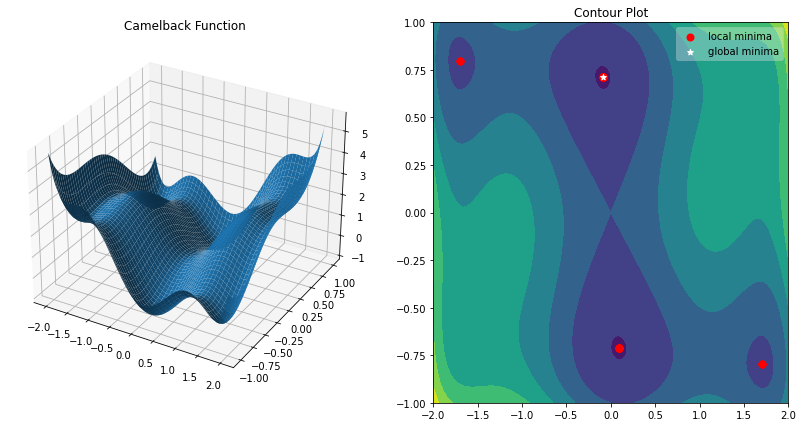

In [2]:
def camelback(point):
    x=point[0]
    y=point[1]
    z = (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2
    return z
# define values on a grid
x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 1, 1000)
xv, yv = np.meshgrid(x, y)
zv = camelback([xv,yv])
# plot funcition
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(xv, yv, zv)

n_step = 20
stepx = np.linspace(-2, 2, n_step)
stepy = np.linspace(-1, 1, n_step)
grid = np.meshgrid(stepx, stepy)

# find minima
minima=[]
min_coordinates=[]
for x_i, y_i in zip(stepx,stepy):
    in_cond=np.array([x_i,y_i])
    optimization = optimize.minimize(camelback, in_cond)
    minima.append(optimization.fun)
    min_coordinates.append(optimization.x)

min_coordinates=np.array(min_coordinates)
minima= np.array(minima)
true_minima = np.min(minima)
global_minima = minima[minima==true_minima]
global_min_coordinates = min_coordinates[minima==true_minima]
print(global_minima, global_min_coordinates)

# plot countour-f plot with minima
ax2 = fig.add_subplot(1, 2, 2)
cset = ax2.contourf(xv, yv, zv)
ax2.scatter(min_coordinates[:,0], min_coordinates[:,1], linewidth=2, color='r', label='local minima' )
ax2.scatter(global_min_coordinates[:,0], global_min_coordinates[:,1], linewidth=1, color='w', marker='*', label='global minima')

# Decoring
ax1.set_title('Camelback Function')
ax2.set_title('Contour Plot')
ax2.legend(framealpha=0.3)
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

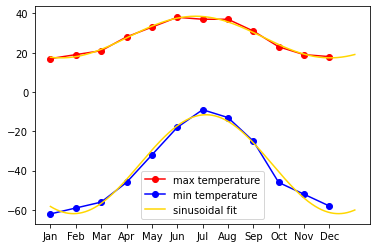

Time offset at max temperatures: -1.32 +- 0.13 day
Time offset at min temperatures: -7.31 +- 0.14 day


In [3]:
maxT = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
minT = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
x = np.arange(12)

# Plot data
fig, ax = plt.subplots(1,1)
ax.set(xticks=x, xticklabels=month)
ax.plot(x,maxT, 'or-', label='max temperature')
ax.plot(x,minT, 'ob-', label='min temperature')
ax.legend()

# define function
def sin_tras(x, A, nu, cx, cy):
    return A * np.sin(0.5 * nu * x + cx) + cy


# try to fit with sin function
popt1, pcov1 = optimize.curve_fit(sin_tras, x, maxT)
popt2, pcov2 = optimize.curve_fit(sin_tras, x, minT)

# plot the fit
xgrid=np.linspace(0,12,1000)
ygrid1=sin_tras(xgrid, *popt1)
ygrid2=sin_tras(xgrid, *popt2)
ax.plot(xgrid, ygrid1, color='gold', label='sinusoidal fit')
ax.plot(xgrid, ygrid2, color='gold')
ax.legend()
plt.show()
print("Time offset at max temperatures: %.2f +- %.2f day"%(popt1[2],np.sqrt(pcov1[2,2])))
print("Time offset at min temperatures: %.2f +- %.2f day"%(popt2[2],np.sqrt(pcov2[2,2])))

**Is the fit reasonable? If not, why?**  
The fit is made with a funciton as $ f=A\sin(\nu t + x) + y$.  
It appear quite good for the max temperature but not so good for the min temperatures, where it is not well fitted in the lowest temperatures.

**Is the time offset for min and max temperatures the same within the fit accuracy?**  
No, they differ by much more than $3\sigma$

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [16]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

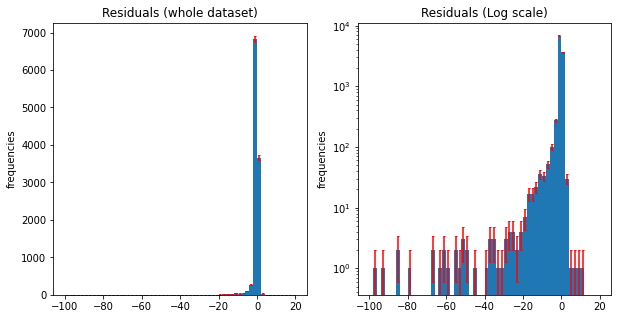

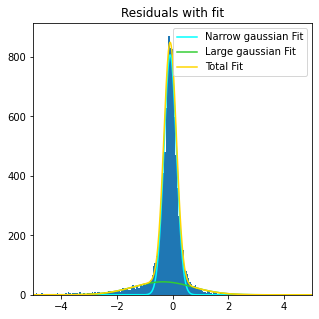

chi_2= 629.9388721506132
p-value = 0.000000


In [96]:
from scipy import stats

# Loading data
data= pd.read_pickle('data/residuals_261.pkl', compression=None)
df = pd.DataFrame.from_dict(data.tolist())

# Plotting histogram
fig, (ax,ax_log) = plt.subplots(1,2, figsize=(10,5))
(n, bins, pathces) =ax.hist(df['residuals'], bins=60 ,range=(-100,20))
ax_log.hist(df['residuals'], bins=60 ,range=(-100,20))
ax.set(title='Residuals (whole dataset)', ylabel='frequencies')
ax_log.set(title='Residuals (Log scale)', ylabel='frequencies', yscale='log')

#set uncertany
poisson=np.sqrt(n)
bins_center = (bins[1:]+bins[:-1])/2
ax.errorbar(bins_center, n, poisson, color='r', linestyle='None', capsize=1)
ax_log.errorbar(bins_center, n, poisson, color='r', linestyle='None', capsize=1)

def gauss(x, xi, sigma, A):
    G = A*stats.norm.pdf(x, xi, sigma)
    return G

# Narrow gaussian fit
fig2, ax2 = plt.subplots(1,1, figsize=(5,5))
(n2, bins2, pathces2) =ax2.hist(df['residuals'], bins=400 ,range=(-10,10))
bins_center2 = (bins2[1:]+bins2[:-1])/2
popt2, pcov2 = optimize.curve_fit(gauss, bins_center2, n2)
x_g2 = np.linspace(bins2[0],bins2[-1],1000)
y_g2 = gauss(x_g2, *popt2)

# Large gaussian fit: bins with less than 50 counts (arbitrary)
(n3, bins3, pathces3) = ax2.hist(df['residuals'], bins=400 ,range=(-10,10), alpha=0.0)
bins_center3 = (bins2[1:]+bins2[:-1])/2
bins_center3_red = bins_center3[n3<50]
n3 = n3[n3<50]
popt3, pcov3 = optimize.curve_fit(gauss, bins_center3_red, n3)
x_g3 = np.linspace(bins3[0],bins3[-1],1000)
y_g3 = gauss(x_g3, *popt3)
y_g4 = y_g3+y_g2   #total fit

# Plotting
ax2.plot(x_g2,y_g2, label="Narrow gaussian Fit", color='cyan')
ax2.plot(x_g3,y_g3, label="Large gaussian Fit", color='limegreen')
ax2.plot(x_g3,y_g4,label="Total Fit", color='gold')
ax2.set(xlim=[-5,5])
ax2.set(title='Residuals with fit')
ax2.legend()
plt.show()

# Compute p-value  NB: remove data with 0 counts
y_data = n2[n2!=0]
y_fit = gauss(bins_center2, *popt2) + gauss(bins_center3, *popt3)
y_fit = y_fit[n2!=0]
n_dof = len(y_data)-1
chi_2 = np.sum((y_data-y_fit)**2/y_data)
p_value = 1. - stats.chi2.cdf(chi_2, n_dof)
print("chi_2=", chi_2)
print("p-value = %.6f"%(p_value))


The p-value of the fit tends to zero, so it is satisfactory.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [7]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

Best parameter found for f(t): a=-9.955  b=12.313  c=9.041


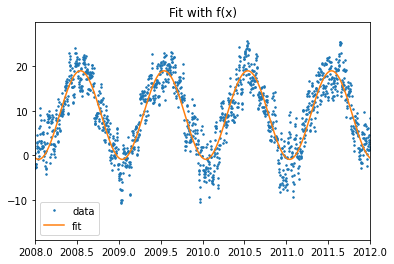

Average temperature: 9.04 °C
Average temperature on coldest days: -0.91 °C
Average temperature on hottest days: 19.00 °C


In [81]:
# Loading and cleaning data
data= pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=' ', names=['year','temperature'])
data=data[(data['temperature']<95.)&(data['temperature']>-95.)]

#defining function
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

# try to fit with sin function
popt, pcov = optimize.curve_fit(f, data['year'], data['temperature'])
print('Best parameter found for f(t): a=%.3f  b=%.3f  c=%.3f'%(popt[0],popt[1], popt[2]))

#Plot
x = np.linspace(2008,2012,100000)
y = f(x,*popt)

fig, ax = plt.subplots(1)
ax.plot(data['year'],data['temperature'],label='data',ls='None', marker='.', markersize=3)
ax.plot(x,y,label='fit')
ax.set(xlim=[2008,2012], title='Fit with f(x)')
ax.legend()
plt.show()

#Answering question
print('Average temperature: %.2f °C'%(popt[2]))
print('Average temperature on coldest days: %.2f °C'%(popt[2]-np.abs(popt[0])))
print('Average temperature on hottest days: %.2f °C'%(popt[2]+np.abs(popt[0])))

The $b$ parameter from $f(t)$ function makes the sinusoid shift orizzontally, and reflect the fact that, in order to obtain a proper fit, the function must be alligned with the data, such that colder days are close to the lower part of the function (and so on).

In [94]:
#defining g function
def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t + c) + d
popt_g, pcov_g = optimize.curve_fit(g, data['year'], data['temperature'])
print('Best parameter found for g(t): a=%.3f  b=%.3f  c=%.3f, d=%.3f'%(popt_g[0],popt_g[1], popt_g[2], popt_g[3]))

# compute RSS for f and g
SSR_f=np.sum(np.square(data['temperature']-f(data['year'],*popt)))
SSR_g=np.sum(np.square(data['temperature']-g(data['year'],*popt_g)))
print('SSR for f: %.2f'%RSS_f)
print('SSR for g: %.2f'%RSS_g)

#Fisher F-test
ndof_f = 3 - 1
ndof_g = 4 - 1
N = len(data['year'])

F = ((SSR_f - SSR_g)/(ndof_g - ndof_f)) / (SSR_g/(N - ndof_g))
CL = 1. - stats.f.cdf(F, ndof_g - ndof_f, N - ndof_g)
print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")


Best parameter found for g(t): a=-9.955  b=1.000  c=15.334, d=9.040
SSR for f: 95529.06
SSR for g: 95508.34
CL: 0.231 , additional parameter necessary: NO
